## Assignment - Week 2
#### Luodaan [alkuperäiseen malliin](https://github.com/kopuj/neuralNetworks/blob/master/Graphical_monitoring.ipynb) perustuva, paranneltu malli, jossa on lisätty ensimmäisen kerroksen neuronien määrää 64 -> 128 l2 regularizerillä ja siihen liittyy dropout joka poistaa 20 % neuroneista. Lisäsin myös toisen kerroksen 128 neuronilla ja l2 regularizerillä, sekä kolmannen kerroksen 64 neuronilla ja l2 regularizerillä ja siihen liittyen dropout 20 %.<br>
#### Tätä mallia käyttäen sain parhaimman MAE:n, mikä on **0.2873**.<br>

In [ ]:
from tensorflow.keras.datasets import california_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
(inputs, targtets), (x_test, y_test) = california_housing.load_data(version='small', test_split=0.2)
x_train = inputs[:380]
y_train = targtets[:380]
x_val = inputs[380:]
y_val = targtets[380:]

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean) / std
x_val = (x_val - mean) / std
x_test = (x_test - mean) / std

y_train /= 1e5
y_test /= 1e5
y_val /= 1e5

In [ ]:
def buildModel():
    model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])
    
    return model

model = buildModel()

In [60]:
history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_data=(x_val, y_val), verbose=0)

Text(0, 0.5, 'Loss')

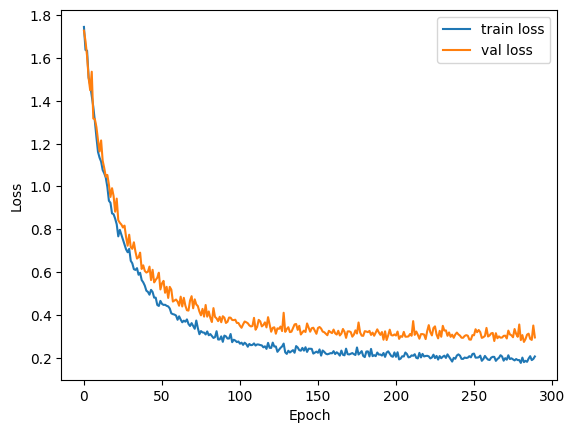

In [61]:
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Mean average error (in 100000 $)')

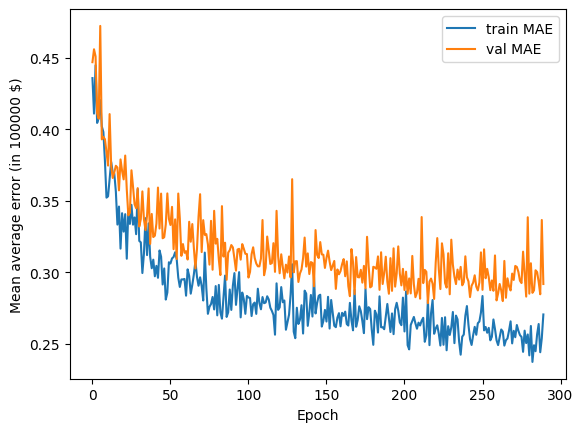

In [62]:
plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean average error (in 100000 $)')

In [63]:
x_train_full = np.concatenate((x_train, x_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

final_model = buildModel()

final_model.fit(x_train_full, y_train_full, epochs=100, batch_size=32, verbose=0)

In [64]:
test_loss, test_mae = final_model.evaluate(x_test, y_test)
print(f'Test mean average error: {test_mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4191 - mae: 0.2916 
Test mean average error: 0.2873
